In [1]:
# Relevant Library
import os
from datetime import datetime

# Numerical Data Process
import pandas as pd

# Visulize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Custom Library
from library.stat_data_extract import stat_data_extract

In [2]:
class CovidBar():
    def __init__(self, threshold=0):
        self.main_data = stat_data_extract(threshold)
        os.makedirs('Images', exist_ok=True)

    def show_wordcloud(self, save=True):
        stopwords = set(STOPWORDS)
        data = {i: j for i, j in zip(
            self.main_data.index, self.main_data.ac_active)}

        wordcloud = WordCloud(
            background_color='white',
            stopwords=stopwords,
            max_words=len(data),
            max_font_size=80,
            scale=3,
            random_state=200
        ).generate_from_frequencies(data).recolor(random_state=63008)

        plt.figure(figsize=(16, 8), facecolor='white', edgecolor='blue')
        plt.title('Active patient of COVID-19 Until ' +
                  self.main_data.Date[0], fontsize=25)
        plt.axis('off')
        plt.tight_layout(pad=0)
        plt.imshow(wordcloud)
        if save:
            plt.savefig('Images/Corona Stats Country wise.png')
        plt.imshow(wordcloud)

    def data_plot(self, row=10, save=True):
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111)

        new_data = self.main_data.sort_values(
            by=['total_case'], ascending=False)[:row]

        plt.bar(new_data.index.values, new_data.c_recover,
                color='limegreen', edgecolor='white', label='Recover')
        plt.bar(new_data.index.values, new_data.c_active, bottom=new_data.c_recover,
                color='darkorange', edgecolor='white', label='Active')
        plt.bar(new_data.index.values, new_data.c_death, bottom=new_data.c_recover +
                new_data.c_active, color='crimson', edgecolor='white', label='Death')

        plt.xlabel("Country Name", fontsize=25)
        plt.ylabel('Patient Number in Percentage', fontsize=25)
        plt.title('Effect of COVID-19 Country Wise Until ' +
                  new_data.Date[0], fontsize=25)

        ax.set_yticklabels([0, 20, 40, 60, 80, 100])
        xtickNames = ax.set_xticklabels(new_data.index.values)

        ax.legend(fontsize=15, loc='lower left')

        plt.setp(xtickNames, rotation=30, fontsize=15)
        if save:
            plt.savefig('Images/Corona.png')
        plt.show()

    def data_bar(self, row=10, index=1, save=True):

        index -= 1

        column_val = [i for i in self.main_data.columns[-4:-1]]

        name = column_val[index]
        if 'w_' in name:
            label = 'World Wise '+name.split('_')[-1].capitalize()
        else:
            label = 'Country Wise '+name.split('_')[-1].capitalize()

        new_data = self.main_data.sort_values(by=[name], ascending=False)

        new_data = new_data[:row]
        color = ['limegreen', 'darkorange', 'crimson']

        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111)
        plt.bar(new_data.index.values, new_data[name],
                color=color[index % 3], edgecolor='white', label=label)

        for i, j in enumerate(new_data[name]):
            ax.text(i, j, '{:.2f}%'.format(100*j),
                    ha='center', va='bottom', fontsize=15)

        plt.xlabel("Country Name", fontsize=25)
        plt.ylabel('Patient Number in Percentage', fontsize=25)
        plt.title('COVID-19 {} Patient Until {}'.format(label,
                                                        new_data.Date[0]), fontsize=25)

        ax.set_yticklabels([])
        xtickNames = ax.set_xticklabels(new_data.index.values)

        ax.legend(fontsize=25, loc='upper right')

        plt.setp(xtickNames, rotation=30, fontsize=15)
        if save:
            plt.savefig('Images/Corona '+label+'.png')

        plt.show()

In [3]:
bar = CovidBar()

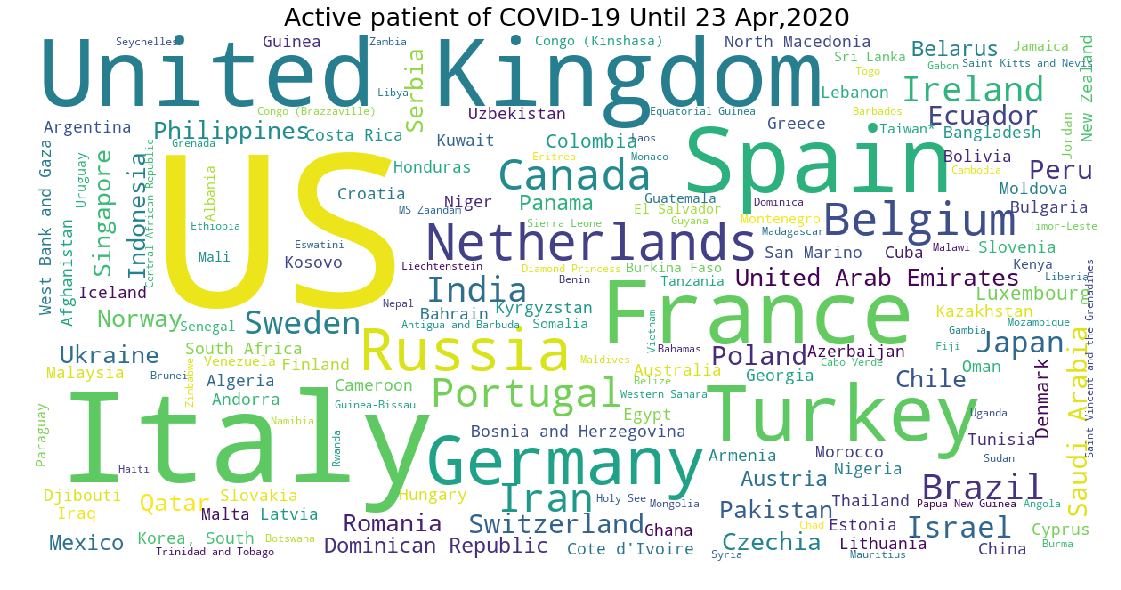

In [4]:
bar.show_wordcloud()

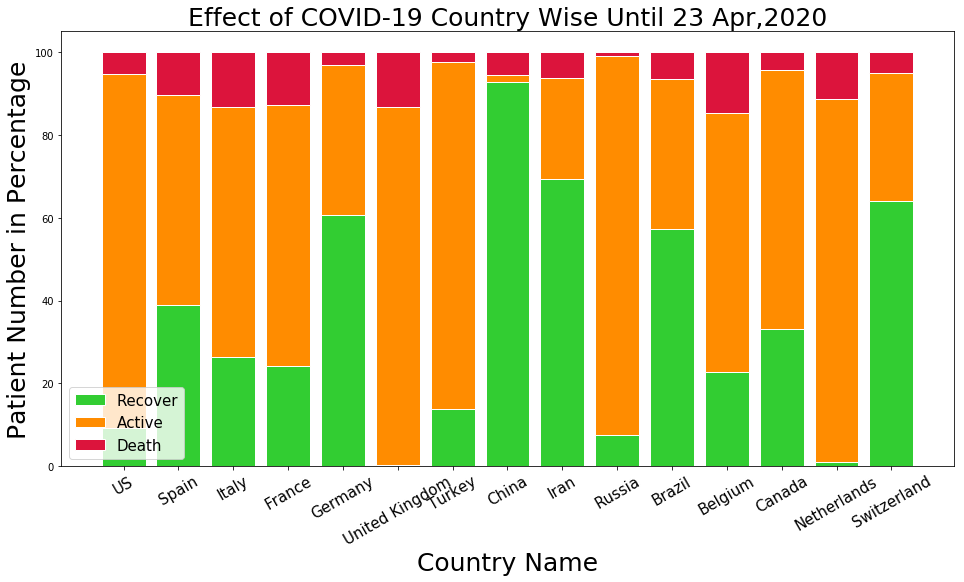

In [5]:
bar.data_plot(row=15)

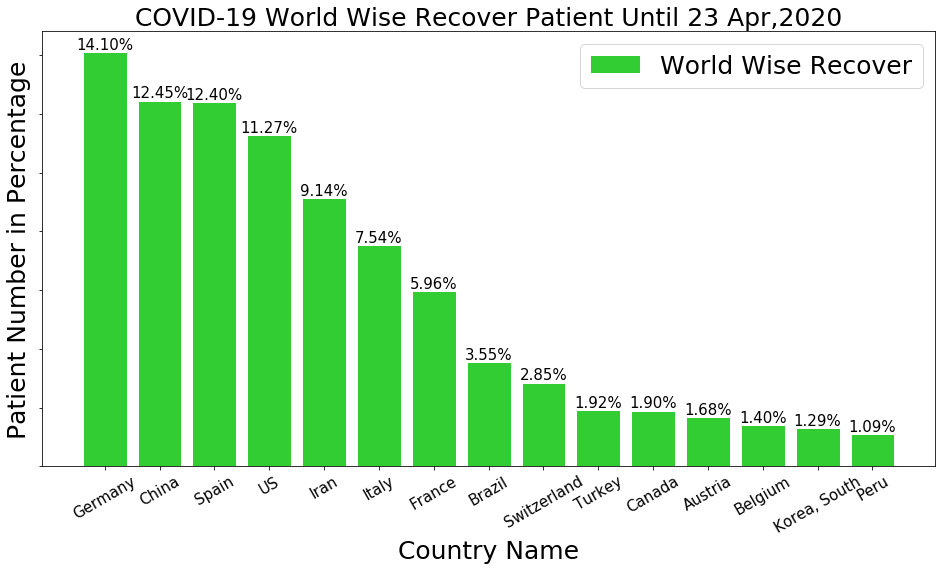

In [6]:
bar.data_bar(row=15, index=1)

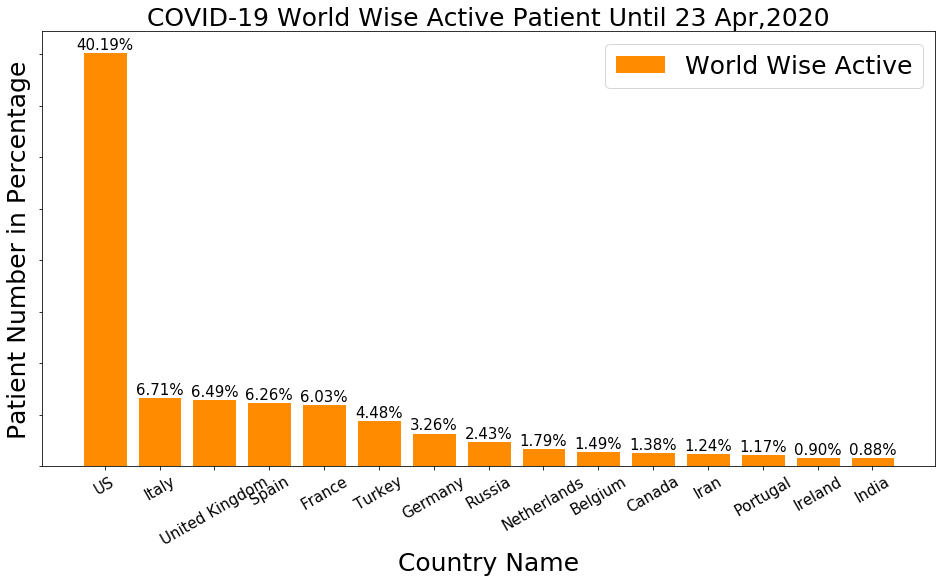

In [7]:
bar.data_bar(row=15, index=2)

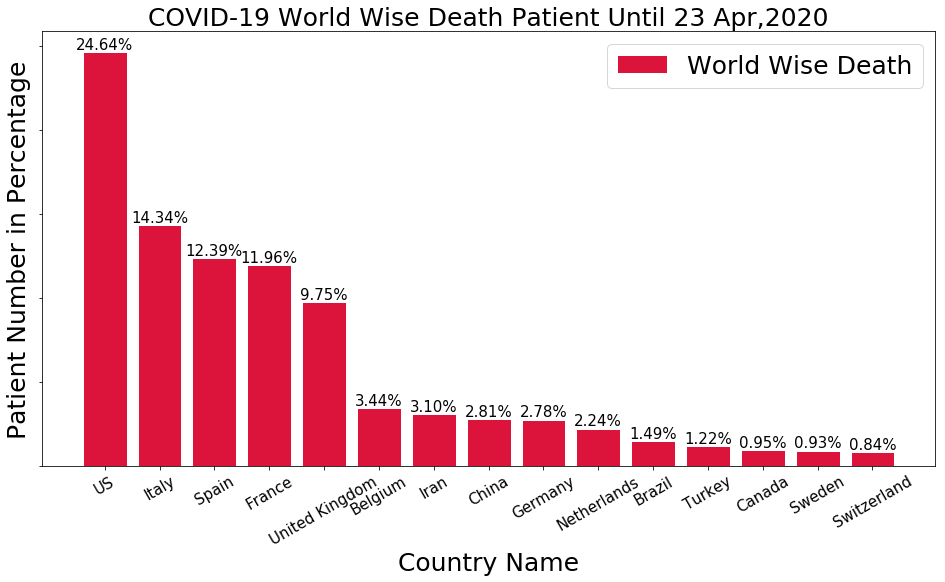

In [8]:
bar.data_bar(row=15, index=3)